## **Data**

- **Date**: 
- **Bike**: Response variable, bike rental count
- **Hour**: Hour of the day, from 0 to 23
- **Temperature**: 
- **Humidity**: 
- **Wind_Speed**: 
- **Visibility**: 
- **Dew_point_temperature**: A quantity calculated from temperature and humidity
- **Solar_Radiation**: 
- **Rainfall**: 
- **Snowfall**: 
- **Holiday**: 
- **Functioning_Day**: 
- **Weekday**: A custom variable to indicate day of the week

### **Data Inspection**
1. ***Dew_point_temperature*** is calculated directly from temperature and humidity, i.e. $T_{dp} \approx T - \frac{100 - RH}{5}$. Should watch for strong collinearity. Dew point temperature, temperature, and humidity are related meteorological variables that describe the state of the atmosphere in terms of moisture content.


## **Inspection and Cleaning**

In [4]:
# Import the necessary libraries
from google.colab import drive
import pandas as pd

# Mount Google Drive to access the CSV file
drive.mount('/content/drive')

# Set the path to the CSV file in your Google Drive, please change it to local file address if you run it locally
file_path = '/content/drive/MyDrive/Group4BikeDataAutumn_Revised.csv'

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the first five rows of the DataFrame
df.head()

Mounted at /content/drive


,Date,Bike,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,Weekday
0,9/1/2018,1892,18,28.8,46,1.3,2000,16.0,0.58,0.0,0.0,No Holiday,Yes,Saturday
1,9/1/2018,1891,19,27.8,48,1.1,2000,15.7,0.08,0.0,0.0,No Holiday,Yes,Saturday
2,9/1/2018,1845,17,29.6,42,1.3,2000,15.3,0.98,0.0,0.0,No Holiday,Yes,Saturday
3,9/1/2018,1678,16,30.5,41,1.4,1930,15.7,1.95,0.0,0.0,No Holiday,Yes,Saturday
4,9/1/2018,1523,23,24.4,54,1.6,2000,14.4,0.00,0.0,0.0,No Holiday,Yes,Saturday


In [ ]:
# Length of data is 1937
len(df)

1937

In [ ]:
# No data where Y=0
sum(df['Bike'] == 0)

0

### **Observations**

In [ ]:
# Looking at the descriptive statistics of the data
df.describe(include='all')

,Date,Bike,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,Weekday
count,1937,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937,1937,1937
unique,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,7
top,9/1/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Holiday,Yes,Monday
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1841,1937,312
mean,NaN,924.110480,11.530718,13.821683,59.044915,1.492101,1558.174497,5.150594,0.522783,0.117656,0.063500,NaN,NaN,NaN
std,NaN,617.547879,6.916504,7.244204,19.058618,0.916309,565.765000,8.111224,0.803732,0.889771,0.521743,NaN,NaN,NaN
min,NaN,2.000000,0.000000,-3.000000,13.000000,0.000000,33.000000,-19.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,427.000000,6.000000,7.900000,44.000000,0.900000,1177.000000,0.100000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,856.000000,12.000000,13.300000,59.000000,1.300000,1901.000000,4.800000,0.000000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1271.000000,18.000000,19.800000,74.000000,2.000000,2000.000000,10.600000,0.890000,0.000000,0.000000,NaN,NaN,NaN


**Abnormalities**

1. ***Solar_Radiation***, ***Rainfall***, ***Snowfall***, all highly skewed to the left, only a few data larger than 0.

## **Feature Engineering**

1. Excluded ***Functioning_Day***, ***Date***
2. Kept ***Weekday*** as it is
3. Created dummies for ***Holiday***, ***Weekday***

In [5]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

df = df.drop(['Functioning_Day', 'Date'], axis=1)

# convert Hour to clusters
# df['TimeoftheDay'] = pd.cut(df['Hour'], bins=[-1, 6, 12, 18, 24], labels=['night', 'morning', 'afternoon', 'evening'], ordered=False)

# Convert the categorical variable using label encoding
# encoder = OneHotEncoder()
# # fit and transform the data
# encoded_data = encoder.fit_transform(df[['Holiday', 'Weekday']])

# # get the feature names
# feature_names = []
# for feature in encoder.categories_:
#     feature_names += list(feature)
# encoded_df.columns = feature_names

# Create dummy variables
holiday_map = {'Holiday': 1, 'No Holiday': 0}
# define a dictionary to map weekday names to numbers
weekday_map = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

# apply the mapping to the weekday and holiday column
df['Weekday'] = df['Weekday'].apply(lambda x: weekday_map[x])
df['Holiday'] = df['Holiday'].apply(lambda x: holiday_map[x])

# apply bins on the response
df['bike_demand'] = np.where(df['Bike'] < 200, 0, np.where(df['Bike'] <= 1100, 1, 2))

# apply high demand on the response
df['bike_demand_high'] = np.where(df['Bike'] > 1100, 1, 0)

# apply low demand on the response
df['bike_demand_low'] = np.where(df['Bike'] < 200, 1, 0)

In [ ]:
df.head(25)

,Bike,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Holiday,Weekday,bike_demand,bike_demand_high,bike_demand_low
0,1892,18,28.8,46,1.3,2000,16.0,0.58,0.0,0.0,0,6,2,1,0
1,1891,19,27.8,48,1.1,2000,15.7,0.08,0.0,0.0,0,6,2,1,0
2,1845,17,29.6,42,1.3,2000,15.3,0.98,0.0,0.0,0,6,2,1,0
3,1678,16,30.5,41,1.4,1930,15.7,1.95,0.0,0.0,0,6,2,1,0
4,1523,23,24.4,54,1.6,2000,14.4,0.00,0.0,0.0,0,6,2,1,0
5,1480,15,30.0,45,0.9,2000,16.7,2.10,0.0,0.0,0,6,2,1,0
6,1440,20,26.9,49,2.1,2000,15.2,0.00,0.0,0.0,0,6,2,1,0
7,1371,14,29.7,42,1.4,2000,15.4,2.37,0.0,0.0,0,6,2,1,0
8,1303,13,29.4,48,1.9,1942,17.2,2.88,0.0,0.0,0,6,2,1,0
9,1110,21,26.0,52,1.4,2000,15.3,0.00,0.0,0.0,0,6,2,1,0


In [6]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Split the dataset into training and testing sets, dropping 'Dew_point_temperature'
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(df.drop(columns = ['Bike', 'bike_demand', 'Dew_point_temperature', 'bike_demand_high', 'bike_demand_low'], axis=1),
                                                    df['bike_demand'],
                                                    test_size=0.25,
                                                    random_state=42)

# add a constant
X_d_train_constant = sm.add_constant(X_d_train) # add an intercept column to the dataset
X_d_test_constant = sm.add_constant(X_d_test) # add an intercept column to the dataset

In [ ]:
# Split the dataset into training and testing sets, dropping 'Dew_point_temperature'
X_train, X_test, y_train, y_test = X_d_train, X_d_test, pd.DataFrame(df['Bike']).loc[y_d_train.index], pd.DataFrame(df['Bike']).loc[y_d_test.index]

# add a constant
X_train_constant = sm.add_constant(X_train) # add an intercept column to the dataset
X_test_constant = sm.add_constant(X_test) # add an intercept column to the dataset

In [ ]:
# check for NA data, none is found
df[df.isnull().any(axis=1)]

,Bike,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Holiday,Weekday,bike_demand


In [ ]:
# # convert the date column to datetime format
# df['Date'] = pd.to_datetime(df['Date'])

# # extract the day, month, and year from the date column
# df['day'] = df['Date'].dt.day
# df['month'] = df['Date'].dt.month
# df['year'] = df['Date'].dt.year

### **Regress *Dew_point_temperature* on *Temperature* and *Humidity***

In [ ]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
x_tp, y_tp = df[['Temperature', 'Humidity']], df['Dew_point_temperature']

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# add a constant
x_tp_constant = sm.add_constant(x_tp) # add an intercept column to the dataset

# create a summary table using statsmodels
est_tp = sm.OLS(y_tp, x_tp_constant).fit() # fit a linear regression model using statsmodels
summary_tp = est_tp.summary() # create a summary table

# print the summary table
print(summary_tp)

                              OLS Regression Results                             
Dep. Variable:     Dew_point_temperature   R-squared:                       0.987
Model:                               OLS   Adj. R-squared:                  0.987
Method:                    Least Squares   F-statistic:                 7.276e+04
Date:                   Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                           22:42:30   Log-Likelihood:                -2605.2
No. Observations:                   1937   AIC:                             5216.
Df Residuals:                       1934   BIC:                             5233.
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -23.14

**Observation**
- The model has very high $R^2$, and the equation yielded is $Dew = -23.14 + 0.93\times Temp + 0.26\times Himidity$, which is very close to the formula mentioned before. So it is a linear combination of the other 2 and we should consider dropping *Dew* or the other two.

## **Exploratory analysis**

### **Check distribution of Y**

(array([177.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 680.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 595.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
        1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
        1.76, 1.8 , 1.84, 1.88, 1.92, 1.96, 2.  ]),
 <BarContainer object of 50 artists>)

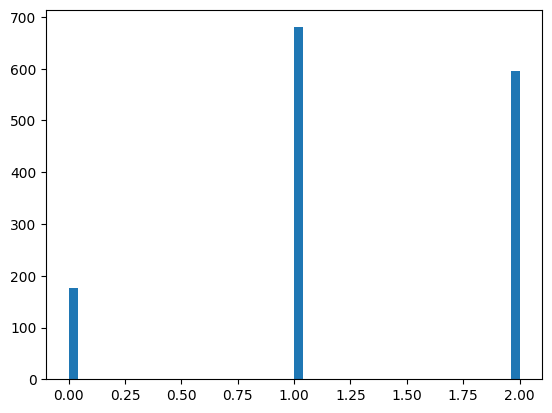

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_train,bins=50)

**Observations**
- **Y has 2 peaks**, one close to 0, one around the mean.
  - This makes Y (bike rental count) very hard to model as we can't find a distribution in the exponential family to match its pattern

### **Covariance**

<Axes: >

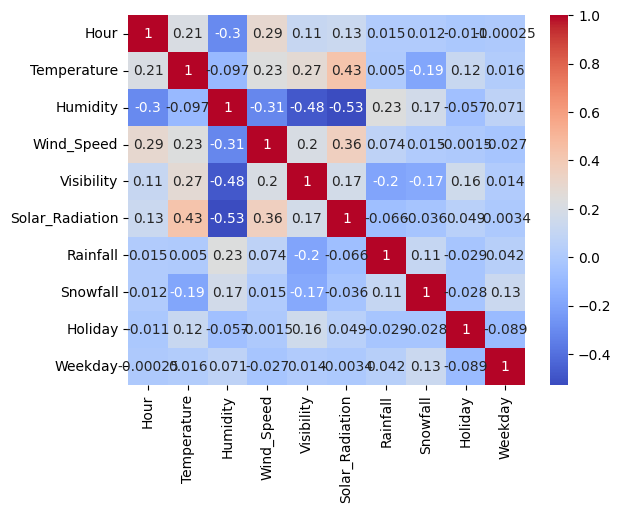

In [ ]:
import seaborn as sns

# create a correlation matrix between all the columns in your DataFrame
corr_matrix = X_train.corr()

# plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

### **K Means**
- Attemp to group the data and check for significant characteristics

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Weekday and holiday is excluded
# calculate WCSS for each number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train.iloc[:,:-2])
    wcss.append(kmeans.inertia_)

# plot the scree plot, ended up choosing 3 clusters
plt.plot(range(1, 11), wcss)
plt.title('Scree Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# create KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# fit the model to the data
kmeans.fit(X_train.iloc[:,:-2])

# predict the cluster assignments for each sample in the data
clusters = kmeans.predict(X_train.iloc[:,:-2])

# print the cluster centers
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X_train.columns[:-2])
print(centers)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        Hour  Temperature   Humidity  Wind_Speed   Visibility  \
0  10.241993    11.201068  63.188612    1.200712  1289.651246   
1  12.197753    15.463708  52.808989    1.669663  1950.905618   
2  10.505338    11.203203  75.341637    1.249466   564.932384   

   Solar_Radiation  Rainfall  Snowfall  
0         0.386441  0.107117  0.113879  
1         0.647011  0.012360  0.006742  
2         0.317402  0.363345  0.226690  


In [ ]:
unique_values, counts = np.unique(clusters, return_counts=True)
print("Unique values:", unique_values)
print("Counts:", counts)

Unique values: [0 1 2]
Counts: [281 890 281]


**Observations**
- From the clustering resutls, these variables represent the groups very well: ***Humidity***, ***Visibility***, ***Dew_point_temperature***, ***Rainfall***, ***Snowfall***, ***Holiday***



- Now let's look at how they correspond to bike rental

In [ ]:
pd.concat([centers, pd.DataFrame([np.mean(y_train[clusters==0]), np.mean(y_train[clusters==1]), np.mean(y_train[clusters==2])], columns=['Mean_Bike_Demand']), pd.DataFrame(counts, columns=["Cluster_count"])], axis=1)

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Mean_Bike_Demand,Cluster_count
0,10.241993,11.201068,63.188612,1.200712,1289.651246,0.386441,0.107117,0.113879,1.174377,281
1,12.197753,15.463708,52.808989,1.669663,1950.905618,0.647011,0.012360,0.006742,1.428090,890
2,10.505338,11.203203,75.341637,1.249466,564.932384,0.317402,0.363345,0.226690,0.957295,281


**Observations**
- They also corresponds to very different bike rental counts, suggests that we can group different bike rental counts with these variables
- For example, larger average solar radiation, rainfall and snowfall all corespond to larger average bike counts
- The clusters are not balanced, with the highest bike count group 3 times as large as the others.

### **PCA**

In [ ]:
# reduce the dimensionality of the data to 2 dimensions using PCA
pca = PCA(n_components=3)
data_pca = pca.fit_transform(X_train.iloc[:,:-3])
components = pca.components_

# plot the reduced data with a different color for each cluster
# plt.scatter(data_pca[:,0], data_pca[:,1], c=clusters)
# plt.title('Clustered Data (PCA)')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.show()
pd.DataFrame(components, columns = X_train.columns[:-3])

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snowfall
0,-0.001533,-0.003482,0.016402,-0.000324,-0.999858,-0.000243,0.000262,0.000170
1,0.135667,-0.017323,-0.990044,0.013995,-0.016401,0.024130,-0.007138,-0.002983
2,-0.583118,-0.808419,-0.066918,-0.030149,0.002627,-0.030270,-0.009356,0.005923


****

After consideration, we need to at least perform some transformations on Y to avoid model assumption violations. We also tried other distribution assumptions

## **Individual Models for High/Low Demand**

In [8]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# High demand, Split the dataset into training and testing sets, dropping 'Dew_point_temperature'
X_h_train, X_h_test, y_h_train, y_h_test = train_test_split(df.drop(columns = ['Bike', 'bike_demand', 'Dew_point_temperature', 'bike_demand_high', 'bike_demand_low'], axis=1),
                                                    df['bike_demand_high'],
                                                    test_size=0.25,
                                                    random_state=42)

# add a constant
X_h_train_constant = sm.add_constant(X_h_train) # add an intercept column to the dataset
X_h_test_constant = sm.add_constant(X_h_test) # add an intercept column to the dataset

In [ ]:
X_h_train

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Holiday,Weekday
1507,19,9.8,45,1.3,1882,0.00,0.0,0.0,0,2
1899,14,6.0,27,0.6,1452,0.34,0.0,0.0,0,4
1187,2,9.5,58,3.0,2000,0.00,0.0,0.0,0,6
1509,20,9.5,44,1.8,1991,0.00,0.0,0.0,0,2
1775,22,2.7,85,1.1,580,0.00,0.0,3.2,0,6
...,...,...,...,...,...,...,...,...,...,...
1130,7,7.3,85,1.4,1039,0.00,0.0,0.0,0,4
1294,16,14.7,32,2.0,1934,1.13,0.0,0.0,0,4
860,14,18.9,31,2.6,1936,2.37,0.0,0.0,0,7
1459,12,10.6,72,2.0,365,0.29,0.0,0.0,0,7


In [9]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Low demand, Split the dataset into training and testing sets, dropping 'Dew_point_temperature'
X_l_train, X_l_test, y_l_train, y_l_test = train_test_split(df.drop(columns = ['Bike', 'bike_demand', 'Dew_point_temperature', 'bike_demand_high', 'bike_demand_low'], axis=1),
                                                    df['bike_demand_low'],
                                                    test_size=0.25,
                                                    random_state=42)

# add a constant
X_l_train_constant = sm.add_constant(X_h_train) # add an intercept column to the dataset
X_l_test_constant = sm.add_constant(X_h_test) # add an intercept column to the dataset

In [ ]:
X_l_train

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Holiday,Weekday
1507,19,9.8,45,1.3,1882,0.00,0.0,0.0,0,2
1899,14,6.0,27,0.6,1452,0.34,0.0,0.0,0,4
1187,2,9.5,58,3.0,2000,0.00,0.0,0.0,0,6
1509,20,9.5,44,1.8,1991,0.00,0.0,0.0,0,2
1775,22,2.7,85,1.1,580,0.00,0.0,3.2,0,6
...,...,...,...,...,...,...,...,...,...,...
1130,7,7.3,85,1.4,1039,0.00,0.0,0.0,0,4
1294,16,14.7,32,2.0,1934,1.13,0.0,0.0,0,4
860,14,18.9,31,2.6,1936,2.37,0.0,0.0,0,7
1459,12,10.6,72,2.0,365,0.29,0.0,0.0,0,7


## **Classifier for Bike Demand**

### **All-in-one Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Fit a random forest classifier
rf = RandomForestClassifier(n_estimators=600, random_state=42)
rf.fit(X_d_train, y_d_train)

# Make predictions on the testing set
y_pred = rf.predict(X_d_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_d_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8680412371134021


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Compute the predictions of the classifier on the test data
y_pred = rf.predict(X_d_test)

# Compute the evaluation metrics
accuracy = accuracy_score(y_d_test, y_pred)
precision = precision_score(y_d_test, y_pred, average='weighted')
recall = recall_score(y_d_test, y_pred, average='weighted')
f1 = f1_score(y_d_test, y_pred, average='weighted')
confusion = confusion_matrix(y_d_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Confusion matrix:\n', confusion)

Accuracy: 0.8680412371134021
Precision: 0.8707265542886313
Recall: 0.8680412371134021
F1 score: 0.8660944714857166
Confusion matrix:
 [[ 48  23   0]
 [  3 230  20]
 [  1  17 143]]


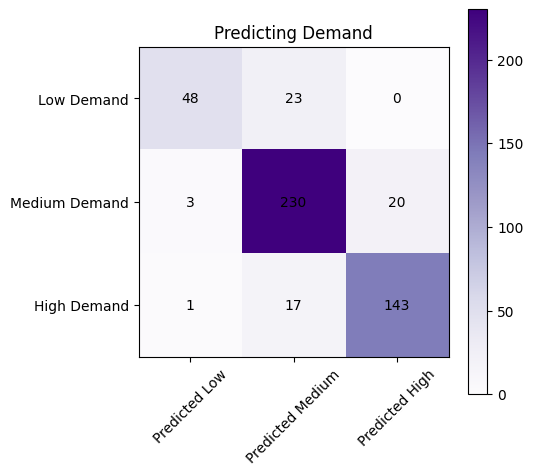

In [ ]:
import matplotlib.pyplot as plt
# plot confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(confusion, cmap='Purples')

# set labels and tick marks
ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))
ax.set_xticklabels(['Predicted Low', 'Predicted Medium', 'Predicted High'])
ax.set_yticklabels(['Low Demand', 'Medium Demand', 'High Demand'])
ax.tick_params(axis='x', labelrotation=45)

# annotate confusion matrix with counts
for i in range(3):
    for j in range(3):
        text = ax.text(j, i, confusion[i, j],
                       ha="center", va="center", color="black")

# set plot title and colorbar
ax.set_title("Predicting Demand")
fig.colorbar(im)

plt.show()

### **High demand**

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Fit a random forest classifier
rf = RandomForestClassifier(n_estimators=600, random_state=42)
rf.fit(X_h_train, y_h_train)

# Make predictions on the testing set
y_pred = rf.predict(X_h_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_h_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9175257731958762


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Compute the predictions of the classifier on the test data
y_pred = rf.predict(X_h_test)

# Compute the evaluation metrics
accuracy = accuracy_score(y_h_test, y_pred)
precision = precision_score(y_h_test, y_pred)
recall = recall_score(y_h_test, y_pred)
f1 = f1_score(y_h_test, y_pred)
confusion = confusion_matrix(y_h_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Confusion matrix:\n', confusion)
# extract true positives, true negatives, false positives, and false negatives from confusion matrix
tn, fp, fn, tp = confusion.ravel()

# calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Accuracy: 0.9175257731958762
Precision: 0.8903225806451613
Recall: 0.8571428571428571
F1 score: 0.8734177215189873
Confusion matrix:
 [[307  17]
 [ 23 138]]
Sensitivity: 0.8571428571428571
Specificity: 0.9475308641975309


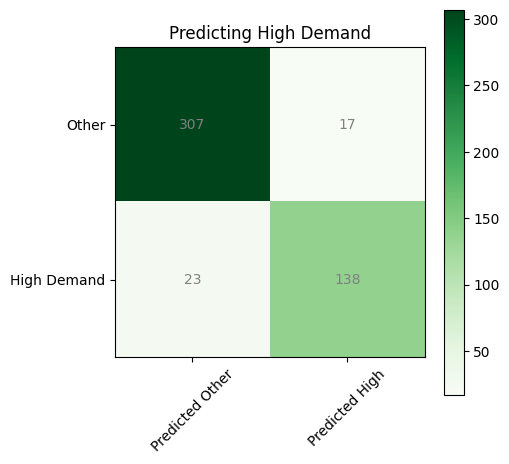

In [ ]:
import matplotlib.pyplot as plt
# plot confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(confusion, cmap='Greens')

# set labels and tick marks
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Predicted Other', 'Predicted High'])
ax.set_yticklabels(['Other', 'High Demand'])
ax.tick_params(axis='x', labelrotation=45)

# annotate confusion matrix with counts
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, confusion[i, j],
                       ha="center", va="center", color="gray")

# set plot title and colorbar
ax.set_title("Predicting High Demand")
fig.colorbar(im)

plt.show()

In [ ]:
np.sum(confusion)

485

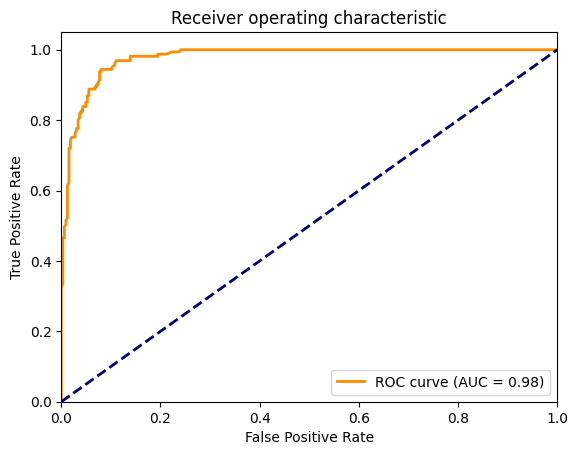

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have a trained random forest classifier called `rf` and test data called `X_test` and `y_test`
y_score = rf.predict_proba(X_h_test)[:, 1] # Get predicted probabilities of positive class
fpr, tpr, _ = roc_curve(y_h_test, y_score) # Calculate FPR and TPR
roc_auc = auc(fpr, tpr) # Calculate AUC

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Display probabilities**

In [ ]:
# Get the predicted probabilities for the testing data
probs = rf.predict_proba(X_h_test)

# Print the predicted probabilities for the first five samples
print(probs[:5])

[[0.04333333 0.95666667]
 [0.96166667 0.03833333]
 [0.08166667 0.91833333]
 [0.95833333 0.04166667]
 [0.72166667 0.27833333]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Set the number of bootstrap samples
n_bootstrap = 100

# Set random state
np.random.seed(33)
indices = np.random.choice(len(X_h_test), 15, replace=False)

# select 15 testing data
X_h_test_sample = X_h_test.iloc[indices]
y_h_test_sample = y_h_test.iloc[indices]
y_test_sample = y_test.iloc[indices]

# need to grab indices from sample cuz indices is the positions
indices = X_h_test_sample.index

# Loop over the selected data points
results = pd.concat([X_h_test_sample, y_test_sample, y_h_test_sample], axis = 1)

results['y_pred'] = None
results['y_pred_prob_0'] = None
results['y_pred_prob_1'] = None

for i in indices:
    x = pd.DataFrame(X_h_test_sample.loc[i]).transpose()
    y_true = y_h_test_sample.loc[i]
    
    # Bootstrap the predictions
    y_pred_boot = []
    
    # Predict on x
    y_pred = rf.predict(x)
    # Get the predicted probabilities for x
    probs = rf.predict_proba(x)

    # Append results to dataframe
    results.loc[i, 'y_pred'] = y_pred[0]
    results.loc[i, 'y_pred_prob_0'] = probs[0][0]
    results.loc[i, 'y_pred_prob_1'] = probs[0][1]

# Convert results to a dataframe
# sort the DataFrame by the 'Salary' column in descending order
results = results.sort_values(by='Bike', ascending=False)

In [ ]:
results

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Holiday,Weekday,Bike,bike_demand_high,y_pred,y_pred_prob_0,y_pred_prob_1
582,22,17.9,50,1.0,2000,0.00,0.0,0.0,0,4,1801,1,1,0.043333,0.956667
654,19,20.0,49,1.5,2000,0.00,0.0,0.0,1,3,1792,1,1,0.08,0.92
788,19,11.1,43,2.0,2000,0.00,0.0,0.0,0,4,1614,1,1,0.045,0.955
1338,17,16.9,33,2.2,1972,0.43,0.0,0.0,0,7,1596,1,1,0.03,0.97
886,21,15.5,86,1.3,178,0.00,0.0,0.0,0,1,1556,1,1,0.48,0.52
1103,21,12.1,67,1.0,1977,0.00,0.0,0.0,0,3,1464,1,1,0.231667,0.768333
1271,22,6.8,58,2.2,1936,0.00,0.0,0.0,0,3,1088,0,0,0.706667,0.293333
1603,15,8.9,34,2.9,1787,0.52,0.0,0.0,0,6,1018,0,0,0.931667,0.068333
774,12,13.7,43,3.4,1980,1.65,0.0,0.0,0,3,1006,0,0,0.826667,0.173333
798,12,13.2,31,3.8,2000,2.58,0.0,0.0,0,4,967,0,0,0.785,0.215


In [ ]:
y_test_sample

1603    1
1310    1
582     2
774     1
886     2
654     2
1271    1
993     1
798     1
950     1
1338    2
788     2
1103    2
115     1
471     1
Name: bike_demand, dtype: int64

### **Low demand**

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Fit a random forest classifier
rf = RandomForestClassifier(n_estimators=600, random_state=42)
rf.fit(X_l_train, y_l_train)

# Make predictions on the testing set
y_pred = rf.predict(X_l_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_l_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.931958762886598


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Compute the predictions of the classifier on the test data
y_pred = rf.predict(X_l_test)

# Compute the evaluation metrics
accuracy = accuracy_score(y_l_test, y_pred)
precision = precision_score(y_l_test, y_pred)
recall = recall_score(y_l_test, y_pred)
f1 = f1_score(y_l_test, y_pred)
confusion = confusion_matrix(y_l_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Confusion matrix:\n', confusion)
# extract true positives, true negatives, false positives, and false negatives from confusion matrix
tn, fp, fn, tp = confusion.ravel()

# calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Accuracy: 0.931958762886598
Precision: 0.9130434782608695
Recall: 0.5915492957746479
F1 score: 0.717948717948718
Confusion matrix:
 [[410   4]
 [ 29  42]]
Sensitivity: 0.5915492957746479
Specificity: 0.9903381642512077


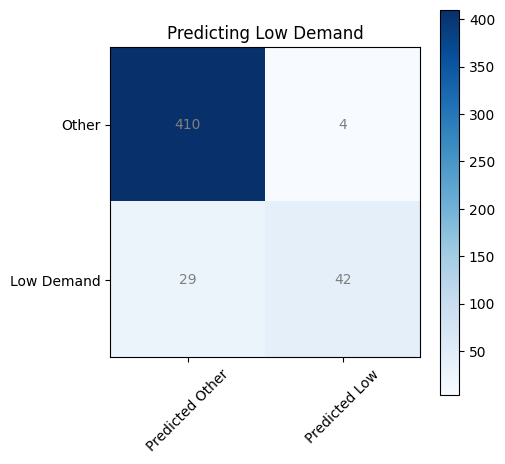

In [ ]:
import matplotlib.pyplot as plt
# plot confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(confusion, cmap='Blues')

# set labels and tick marks
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Predicted Other', 'Predicted Low'])
ax.set_yticklabels(['Other', 'Low Demand'])
ax.tick_params(axis='x', labelrotation=45)

# annotate confusion matrix with counts
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, confusion[i, j],
                       ha="center", va="center", color="gray")

# set plot title and colorbar
ax.set_title("Predicting Low Demand")
fig.colorbar(im)

plt.show()

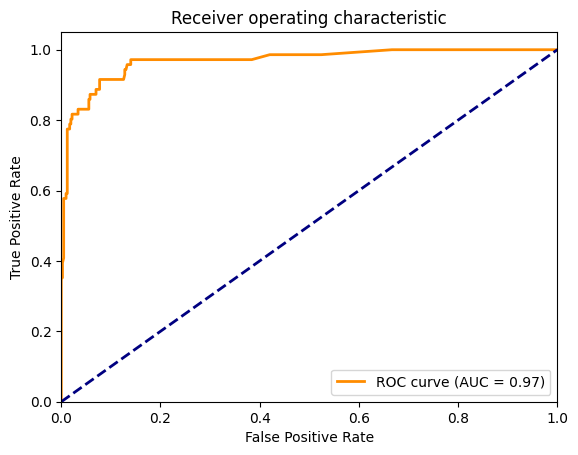

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have a trained random forest classifier called `rf` and test data called `X_test` and `y_test`
y_score = rf.predict_proba(X_l_test)[:, 1] # Get predicted probabilities of positive class
fpr, tpr, _ = roc_curve(y_l_test, y_score) # Calculate FPR and TPR
roc_auc = auc(fpr, tpr) # Calculate AUC

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## **XGBoost**

### **High Demand**

In [ ]:
import xgboost as xgb

# define XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', n_estimators=1000, learning_rate=0.01)

# train the model
xgb_clf.fit(X_h_train, y_h_train)

# make predictions on test set
y_pred = xgb_clf.predict(X_h_test)

In [ ]:
# evaluate the model
accuracy = accuracy_score(y_h_test, y_pred)
confusion = confusion_matrix(y_h_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Confusion matrix:\n', confusion)
# extract true positives, true negatives, false positives, and false negatives from confusion matrix
tn, fp, fn, tp = confusion.ravel()

# calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Accuracy: 0.931958762886598
Precision: 0.9170311696949541
Recall: 0.9175257731958762
F1 score: 0.9171211121713176
Confusion matrix:
 [[305  19]
 [ 14 147]]
Sensitivity: 0.9130434782608695
Specificity: 0.941358024691358


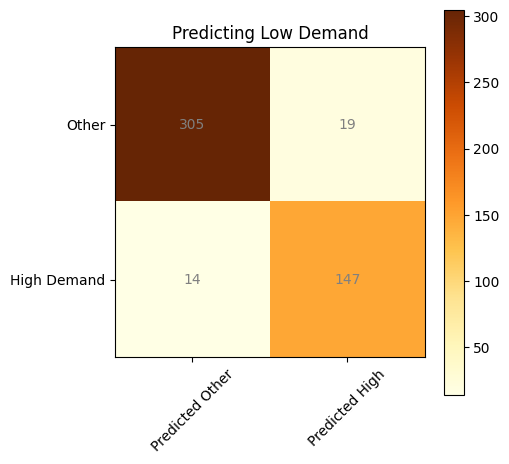

In [ ]:
import matplotlib.pyplot as plt
# plot confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(confusion, cmap='YlOrBr')

# set labels and tick marks
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Predicted Other', 'Predicted High'])
ax.set_yticklabels(['Other', 'High Demand'])
ax.tick_params(axis='x', labelrotation=45)

# annotate confusion matrix with counts
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, confusion[i, j],
                       ha="center", va="center", color="gray")

# set plot title and colorbar
ax.set_title("Predicting High Demand")
fig.colorbar(im)

plt.show()

XGboost for high demand has a better specificity but also higher misclassification rate

### **Low Demand**

In [16]:
import xgboost as xgb

# define XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', n_estimators=1000, learning_rate=0.01)

# train the model
xgb_clf.fit(X_l_train, y_l_train)

# make predictions on test set
y_pred = xgb_clf.predict(X_l_test)

In [17]:
# evaluate the model
accuracy = accuracy_score(y_l_test, y_pred)
confusion = confusion_matrix(y_l_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Confusion matrix:\n', confusion)
# extract true positives, true negatives, false positives, and false negatives from confusion matrix
tn, fp, fn, tp = confusion.ravel()

# calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Accuracy: 0.9463917525773196
Precision: 0.9130434782608695
Recall: 0.5915492957746479
F1 score: 0.717948717948718
Confusion matrix:
 [[410   4]
 [ 22  49]]
Sensitivity: 0.6901408450704225
Specificity: 0.9903381642512077


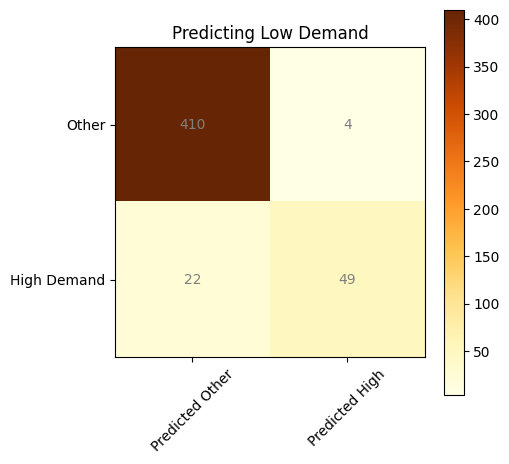

In [19]:
import matplotlib.pyplot as plt
# plot confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(confusion, cmap='YlOrBr')

# set labels and tick marks
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Predicted Other', 'Predicted High'])
ax.set_yticklabels(['Other', 'High Demand'])
ax.tick_params(axis='x', labelrotation=45)

# annotate confusion matrix with counts
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, confusion[i, j],
                       ha="center", va="center", color="gray")

# set plot title and colorbar
ax.set_title("Predicting Low Demand")
fig.colorbar(im)

plt.show()